<a href="https://colab.research.google.com/github/bamboohorseking/INDE577/blob/main/Gradient_descent_Neural_network_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Gradient Descent, Neural Network I 
By: Shiyuan Wang


### Definition of Gradient Descent 
Gradient descent is a general iterative method for solving min(f(x)), where f(x) is some differentiable function. (First order method) Global minimums basically impossible in general, so the best we can hope for is to find the local minimum. \
For Example, $$f(x) = (x-2)^2 +1 = x^2 - 4x +5$$ we have access to f(x) and f'(x). Initialize: $X_0 = 4.0$ (random guess) iterate $X_1 = X_0 - \alpha * f'(x)$, in machine learning, $\alpha$ is the learning rate, and in practice we do not care about how to optimize $\alpha$, we can just try. let's set $\alpha$ = 0.25, $X_1$ = 3, $X_2$ = 3 - 0.25* 2 = 2.5, $X_3$ = 2.25. \
If we keep iterating this process, by infinite times, we will reach a global minimus theoretically. \
And the figure below illustrates how the algorithm of gradient descent works:

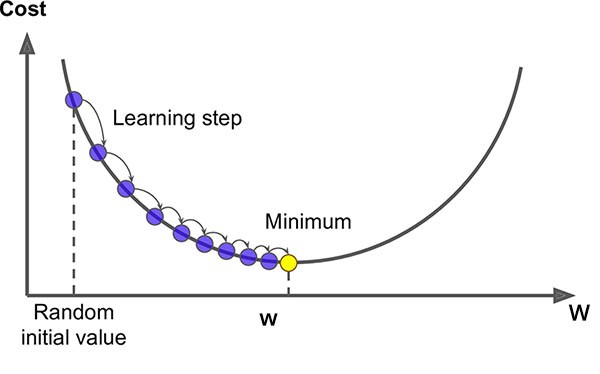

### Definition of Neural Network
A neural network is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates.\
Component for Neural Network:  1. weights/bias 2. Activation function 3. Loss function. \\
The figure below illustrates the most basic neural network algorithm:
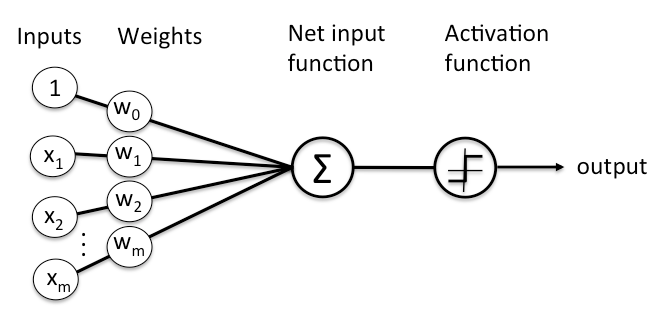


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [19]:
data = pd.read_csv("Gradient_descent.csv")

X = data['x'].tolist()
y = data['y'].tolist()

In this assignment, I will use linear regression to fit the dataset in the begining.  I will also use neural network model and gradient descent method to fit the dataset again. And I will make comparisions between those 2 models.

The following packages will be needed to run the code below:


*   matplotlib.pyplot: [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)
*   numpy: [documentation](https://numpy.org/devdocs/)
*   pandas: [documentation](https://pandas.pydata.org/docs/)
*   sklearn: [documentation](https://scikit-learn.org/stable/)




First, we should take a look at the distribution of the dataset. Suprisingly, we find out that our dataset is following a certain trend and it seems very linear, which means the linear regression may be very suitable for this case, but I still want to see if neural network model with gradient descent method can perform as well as linear regression or even better than linear regression.

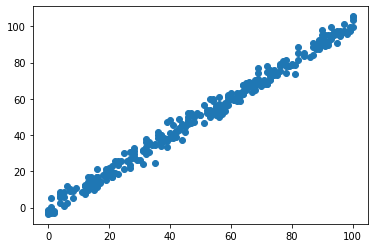

In [8]:
plt.scatter(X,y)

### Linear Regression
Definition: Linear Regression is a process of finding a straight line (as by least squares) that best approximates a set of points on a graph. \\

Given an input sample  $\overrightarrow{x}=[x_1,x_2,...,x_n]$ , linear regression predicts a  y  value using the following equation: $ŷ =θ_0+θ_1x_1+θ_2x_2+...+θ_nx_n$.\
Given  m  training samples {$\vec{x_1}, \dots, \vec{x_m}$}, our goal is to minimize the error between actual value y and predicted value $\hat{y}$.\
$MSE = \frac{1}{m} \sum_{i =1}^m (\hat{y} - y)^2 = \frac{1}{m} \sum_{i =1}^m (\vec{\theta}*\vec{x} - y)^2$.\
By solving this equation, we can get: $\hat{\vec{\theta}} = (X^TX)^{-1}*X^T * y$. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  # This is added back by InteractiveShellApp.init_path()


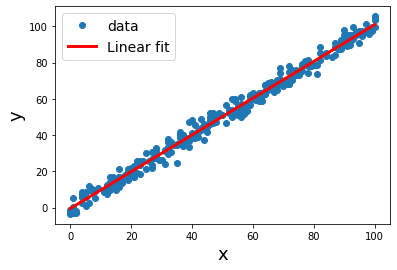

In [4]:
from sklearn.linear_model import LinearRegression
xb = np.c_[np.ones((len(X),1)),X]
# calculate linear regression parameters theta using the normal equation
thetaHat = np.linalg.inv(xb.T.dot(xb)).dot(xb.T).dot(y)

# plot the fit and the data
xFit = np.linspace(0,100,num = 200)
xFitb = np.c_[np.ones((len(xFit),1)), xFit]
yFit = xFitb.dot(thetaHat)

plt.plot('x','y',data = data, marker = 'o', linestyle = '', label = 'data')
plt.plot(xFit, yFit, color = 'r', lw = 3, label = 'Linear fit')
plt.xlabel('x',fontsize = 18)
plt.ylabel('y', fontsize = 18)
plt.legend(fontsize = 14)
plt.show()

### Neural Network and Gradient Descent


Goal: Find the best line fitting this dataset, we want to find the optimal linear function approimating the data.\
Given an input sample  $\overrightarrow{x}=[x_1,x_2,...,x_n]$, neural networks predicts a y value using the following equation: $ŷ = \vec{w}. \vec{x} + \vec{b}$, in which w is the weights, b is the intercept.\
We can calculate the error in form of: $L(w,b,x_i) = \frac{1}{2}(w_i x_i - y_i)^2$.\
Given  m  training samples {$\vec{x_1}, \dots, \vec{x_m}$}, our goal is to minimize the error between actual value y and predicted value $\hat{y}$.\
We will have: $L(w,b,x_i) = \frac{1}{2m}\sum_{i=1}^m(w_i x_i + b_i - y_i)^2$, and we are trying to minimize thsi term.\
Therefore, we can use Gradient method to find the local minimum of that term. And we can get: $\frac{dL(w,b)}{dw} =\frac{1}{m}\sum_{i=1}^m(w_i x_i + b_i - y_i)x_i$, $\frac{dL(w,b)}{db} =\frac{1}{m}\sum_{i=1}^m(w_i x_i + b_i - y_i)$.\
Then we can apply Gradient descent method on our neural network model in the following steps:\
1.  Randomly choose the initial value $w_0, b_0$. 
2.  Set stopper (MAX_ITER = 50 and count = 0). 
3.  While count less than MAX_ITER, we can let $w = w - \alpha.\frac{dL}{dw}, b = b - \alpha.\frac{dL}{db}$. 



In [ ]:
First, define loss function. 

In [39]:
def loss(X, y, w, b):
    M = len(y)
    MSE_loss = sum(0.5*(x*w+b-y[i])**2 for i,x in enumerate(X))/M
    return MSE_loss

Next, define the iteration function for w and b.

In [40]:

def gradL(X,y, w,b): 
    M = len(y)
    partial_w = sum((x*w+b-y[i])*x for i,x in enumerate(X))/M
    partial_b = sum((x*w+b-y[i]) for i,x in enumerate(X))/M
    return partial_w, partial_b

In the begining, we set the learning rate = 0.12. I want to see how the model fit changes as the iteration number increase, so I plot the fit line at iteration number = 10, 20, 30, 50, 100.  

Loss at iter10 = 2.281235805109035e+59
Loss at iter20 = 3.656700689058613e+111
Loss at iter30 = 5.861498359536093e+163
Loss at iter50 = 1.5060767914434261e+268
Loss at iter100 = inf


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


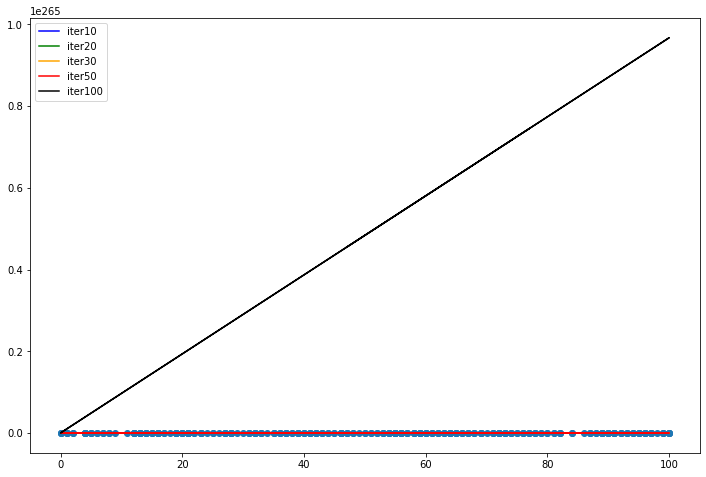

In [42]:
alpha = 0.12 #learning rate
random_vec = np.random.rand(2)
w = random_vec[0]
b = random_vec[1]
plt.figure(figsize = (12,8))
plt.scatter(X,y)
colors = {10:'blue', 20:'green', 30:'orange' , 50:'red', 100: 'black'}
for i in range(101):
    dw,db = gradL(X, y, w, b)
    w -= alpha*dw
    b -= alpha*db
    L = loss(X,y,w,b)
    if i in [10, 20, 30, 50, 100]:
        print(f'Loss at iter{i} = {L}')
        plt.plot(X, [w*x+b for x in X], label = f'iter{i}', color = colors[i])
plt.legend()
plt.show() 

According to the plot, it seems that something went wrong during this process, and I found out that we should not set the learning rate to be this large since the value of my dataset is large, and dataset is kind of following a trend. 

Loss at iter10 = 243.54829109513463
Loss at iter20 = 63.00098736720245
Loss at iter30 = 18.949541819170086
Loss at iter50 = 5.579083029696106
Loss at iter100 = 4.733415266317097


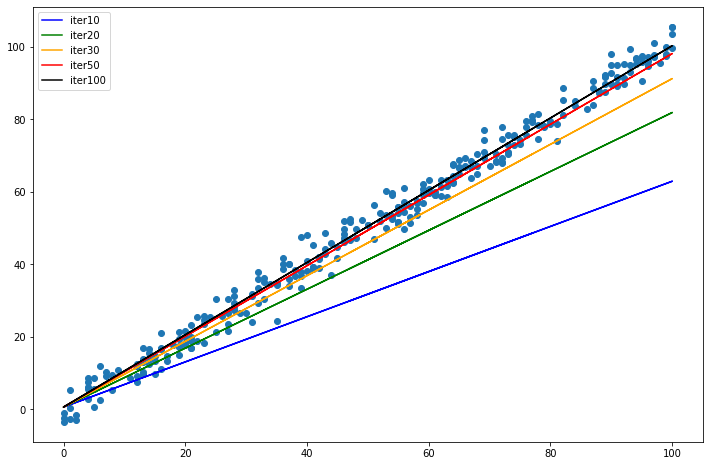

In [13]:
alpha = 0.00002 #learning rate
random_vec = np.random.rand(2)
w = random_vec[0]
b = random_vec[1]
plt.figure(figsize = (12,8))
plt.scatter(X,y)
colors = {10:'blue', 20:'green', 30:'orange' , 50:'red', 100: 'black'}
for i in range(101):
    dw,db = gradL(X, y, w, b)
    w -= alpha*dw
    b -= alpha*db
    L = loss(X,y,w,b)
    if i in [10, 20, 30, 50, 100]:
        print(f'Loss at iter{i} = {L}')
        plt.plot(X, [w*x+b for x in X], label = f'iter{i}', color = colors[i])
plt.legend()
plt.show() 


According to the figure above, it is obvious that after 50 times iteration, the model fit of neural network is very close to the model fit by linear regression. So I am curious about how those 2 models perform on prediction, and I will measure the MSE of each model to determine which model is more suitable for this dataset. 

First, I will split the whole dataset into training set and test set by the ratio of 3:1. And I will calculate the MSE of linear regression model. 

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['x'], data['y'], test_size = 0.25, random_state = 42)
ln = LinearRegression()
X_train = X_train.to_numpy().reshape(-1,1)
y_train = y_train.to_numpy().reshape(-1,1)
X_test = X_test.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)
ln.fit(X_train, y_train)
error_linear = 1/len(y_test) * sum((ln.predict(X_test) - y_test)**2)
error_linear

array([9.68237067])

Next, I will use the same training set and test set to calculate the MSE of neural network model with iteration number = 50. 

In [53]:
alpha = 0.00002 #learning rate
random_vec = np.random.rand(2)
w = random_vec[0]
b = random_vec[1]
for i in range(51):
    dw,db = gradL(X, y, w, b)
    w -= alpha*dw
    b -= alpha*db
    L = loss(X,y,w,b)
error_neural_1 = loss(X_test,y_test,w,b)
error_neural_1

array([5.73582465])

According to the result above, it is clear that after 50 iteration of gradient descent, the neural network model perform better than liear regression model. However, I am still curious about if we keep increasing the iteration number, will the MSE of nerual network model keep decreasing? First, I will try 100 iteration times.

In [54]:
alpha = 0.00002 #learning rate
random_vec = np.random.rand(2)
w = random_vec[0]
b = random_vec[1]
for i in range(101):
    dw,db = gradL(X, y, w, b)
    w -= alpha*dw
    b -= alpha*db
    L = loss(X,y,w,b)
error_neural_2 = loss(X_test,y_test,w,b)
error_neural_2

array([4.86954262])

Then, I will try 200 iteration times. 

In [59]:
alpha = 0.00002 #learning rate
random_vec = np.random.rand(2)
w = random_vec[0]
b = random_vec[1]
for i in range(201):
    dw,db = gradL(X, y, w, b)
    w -= alpha*dw
    b -= alpha*db
    L = loss(X,y,w,b)
error_neural_3 = loss(X_test,y_test,w,b)
error_neural_3

array([4.85639875])

From the result above, if we keep increase the iteration number, at some point, the MSE of the whole model won't decrease, and it will even increase for some reason. From this assignment, I learned how to use linear regression and neural network to do the model fit of my dataset, and I also learned how to use gradient descent to improve the neural network model. In the end, I would say the neural network model with gradient descent method is more suitable for my dataset. 